# General notebook for visualizing scripts and scratches results

Compatible scripts:

DQN:
* script40


In [53]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch

def db_to_power(x):
    return 10**(x/10)
# %matplotlib inline

# Testing data

In [99]:
FILE_NAME = 'script40'
filepath = f'D:\\Dev\\sys-simulator-2\\data\\dql\\{FILE_NAME}.pickle'
# filepath = 'D:\\Dev\\sys-simulator-2\\data\\a3c\\scratch7.pickle'
file = open(filepath, 'rb')
data = pickle.load(file)
file.close()

## MUE success rate

Text(0.5, 0, 'Number of D2D pairs')

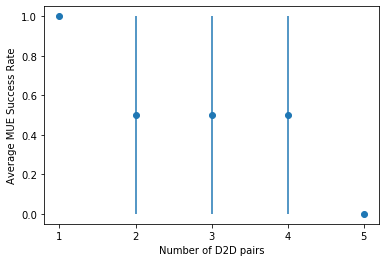

In [51]:
mue_success_rate = data['mue_success_rate']
std_mue_success_rate = np.std(mue_success_rate, axis=1).tolist()
mean_mue_success_rate = np.mean(mue_success_rate, axis=1).tolist()
# plt.plot(range(1, len(mean_mue_success_rate)+1, 1), mean_mue_success_rate, '.')
plt.errorbar(range(1, len(mean_mue_success_rate)+1), mean_mue_success_rate,
             std_mue_success_rate, linestyle='None', marker='o')
plt.xticks(range(1, len(mean_mue_success_rate)+1, 1))
plt.ylabel('Average MUE Success Rate')
plt.xlabel('Number of D2D pairs')

In [38]:
mean_mue_success_rate

array([1. , 0.5, 0.5, 0.5, 0. ])

## MUE Spectral Efficiencies

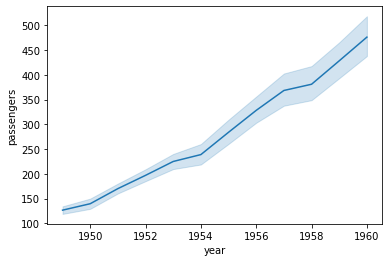

In [96]:
flights = sns.load_dataset("flights")
flights_wide = flights.pivot("year", "month", "passengers")
sns.lineplot(data=flights, x="year", y="passengers")

In [98]:
flights_wide

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


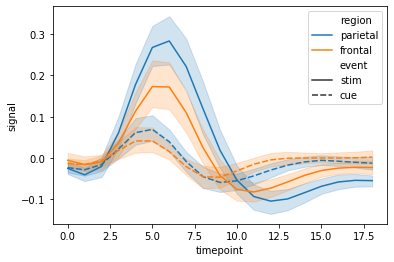

In [55]:
# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

In [56]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [82]:
n_d2d.shape

(10000,)

In [90]:
df

,speffs,n_d2d
0,3.554481,1.0
1,23.020574,1.0
2,23.020574,1.0
3,23.020574,1.0
4,23.020574,1.0
...,...,...
9995,1.115225,5.0
9996,1.115225,5.0
9997,1.096031,5.0
9998,1.096031,5.0


Text(0.5, 0, 'Number of D2D pairs')

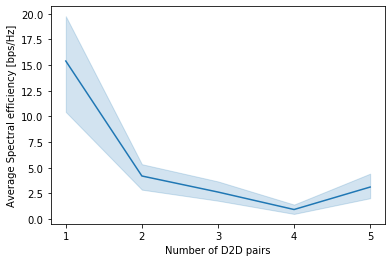

In [101]:
mue_speffs = np.array(data['mue_speffs'])
aux = np.ones((mue_speffs.shape[0], np.prod(mue_speffs.shape[1:])))
for i in range(len(aux)):
    aux[i] *= i+1
n_d2d = aux.reshape(-1)
aux2 = mue_speffs.reshape(-1)

df = pd.DataFrame({'speffs': aux2, 'n_d2d': n_d2d})
df['dummy'] = 'Spectral Efficiency'

# std_mue_success_rate = np.std(mue_success_rate, axis=1).tolist()
# mean_mue_speffs = np.mean(mue_success_rate, axis=1).tolist()
# speff_threshold = np.log2(1 + db_to_power(data['mue_sinr_threshold'])) 
# baseline = speff_threshold * np.ones(len(mue_speffs))

sns.lineplot(x="n_d2d", y="speffs",data=df)

# plt.plot(range(1, len(mue_success_rate)+1, 1), mue_speffs)
# plt.plot(range(1, len(mue_success_rate)+1, 1), baseline)
x_ticks = df['n_d2d'].unique()
x_ticks.sort()
plt.xticks(x_ticks)
plt.ylabel('Average Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')


## D2D Summed Spectral Efficiencies

Text(0.5, 0, 'Number of D2D pairs')

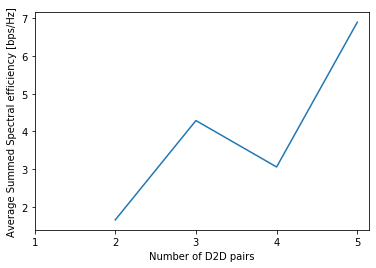

In [18]:
d2d_speffs = data['d2d_speffs']
plt.plot(range(1, len(mue_success_rate)+1, 1), d2d_speffs)
plt.xticks(range(1, len(mue_success_rate)+1, 1))
plt.ylabel('Average Summed Spectral efficiency [bps/Hz]')
plt.xlabel('Number of D2D pairs')

## Summed rewards

Text(0.5, 0, 'Number of D2D pairs')

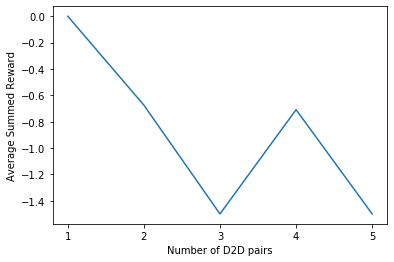

In [19]:
rewards = data['rewards']
plt.plot(range(1, len(mue_success_rate)+1, 1), rewards)
plt.xticks(range(1, len(mue_success_rate)+1, 1))
plt.ylabel('Average Summed Reward')
plt.xlabel('Number of D2D pairs')